In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
ml-03の講義資料や演習の内容を参考にしました。

## 問題の前準備

In [2]:
# Dataset IV
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = x.astype(np.longdouble)
y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y.astype(int) - 1

In [3]:
# 最初の5県を表示
print(x[:5])
print(y[:5])

[[ 1.25969071 -1.14648023 -0.78210849  0.27182091]
 [-0.2114496   0.5464779   1.39535824  1.01765271]
 [-0.71028972 -0.57969757  0.87434911 -1.49382154]
 [ 1.46471052  1.32902985  1.17950966 -1.40158203]
 [-1.29436229  1.40843203  1.41964397  1.33727064]]
[ 1 -1  1  1 -1]


In [4]:
# xを4*5行列に変換して、最初の行は1にする
x = np.hstack([np.ones((n, 1)), x])
print(x[:5])

[[ 1.          1.25969071 -1.14648023 -0.78210849  0.27182091]
 [ 1.         -0.2114496   0.5464779   1.39535824  1.01765271]
 [ 1.         -0.71028972 -0.57969757  0.87434911 -1.49382154]
 [ 1.          1.46471052  1.32902985  1.17950966 -1.40158203]
 [ 1.         -1.29436229  1.40843203  1.41964397  1.33727064]]


In [5]:
# 諸々の関数の定義
def sigmoid(x):
    if x >= 0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x))

def J(w, x, y, lam):
    answer = 0
    for x_i, y_i in zip(x, y):
        answer += np.log(1 + np.exp(-y_i * np.dot(w, x_i)))
    answer += lam / 2 * np.dot(w, w)
    return answer

def grad_J(w, x, y, lam):
    answer = np.zeros(len(w))
    for x_i, y_i in zip(x, y):
        # sigmoid関数の中身を-にしているのがポイント
        answer += -y_i * x_i * sigmoid(-y_i * np.dot(w, x_i))
    answer += lam * w
    return answer

def hess_J(w, x, y, lam):
    answer = np.zeros((len(w), len(w)))
    for x_i, y_i in zip(x, y):
        answer += np.outer(x_i, x_i) * sigmoid(-y_i * np.dot(w, x_i)) * sigmoid(y_i * np.dot(w, x_i))
    answer += lam * np.eye(len(w))
    return answer

## Batch steepest gradient method と Newton method の比較

In [6]:
def gradient_method(w_init, x, y, lam, eta, num_iter):
    w = w_init.copy()
    J_values = []
    for i in range(num_iter):
        w -= eta * grad_J(w, x, y, lam)
        J_values.append(J(w, x, y, lam))
    return w, J_values

def newton_method(w_init, x, y, lam, num_iter):
    w = w_init.copy()
    J_values = []
    for i in range(num_iter):
        w -= np.linalg.solve(hess_J(w, x, y, lam), grad_J(w, x, y, lam))
        J_values.append(J(w, x, y, lam))
    return w, J_values

# パラメータの初期値
w_init = np.random.rand(5)
lam = 0.1
eta = 0.1
num_iter = 100

# 勾配法でw_hatを求める。
w_hat, _ = gradient_method(w_init, x, y, lam, eta, num_iter)

In [7]:
# w_hatを使って、勾配法のJ(w)とJ(w_hat)の絶対値の差を計算する
num_iter = 100
_, gradinet_J_values = gradient_method(w_init, x, y, lam, eta, num_iter)

gradinet_J_diff = [np.abs(J_value - J(w_hat, x, y, lam)) for J_value in gradinet_J_values]
print(gradinet_J_diff)

[7.7569705993672, 0.8234590729675979, 0.4347588011382122, 0.334293806129228, 0.27785590424212003, 0.23558937154226456, 0.20120568118099413, 0.17248701860760818, 0.14824704340496453, 0.12767561089442836, 0.11015391944036423, 0.0951870001263515, 0.08237094693531688, 0.07137275295669454, 0.0619160437622952, 0.05377028344778623, 0.04674234941500188, 0.04066984881540492, 0.03541576279350167, 0.030864122378797987, 0.02691649537436902, 0.02348911628690331, 0.020510529765807917, 0.01791964669683921, 0.015664133808318326, 0.013699074258628485, 0.011985849485100175, 0.01049120255167324, 0.009186451018827313, 0.008046823492463773, 0.0070508988605659795, 0.006180131092349939, 0.0054184455677770416, 0.00475189539325882, 0.004168368169885639, 0.003657335312706067, 0.0032096373496379726, 0.002817299717737143, 0.002473374468525691, 0.0021718040322262766, 0.001907303800152249, 0.001675260791465405, 0.0014716460921881946, 0.001292939106537716, 0.0011360619551474826, 0.000998322603031454, 0.0008773655082

In [10]:
# w_hatを使って、勾配法のJ(w)とJ(w_hat)の差を計算する
num_iter = 100
_, newton_J_values = newton_method(w_init, x, y, lam, num_iter)

newton_J_diff = [np.abs(J_value - J(w_hat, x, y, lam)) for J_value in newton_J_values]
print(newton_J_diff)

[24.99021010797249, 8.672365584765824, 2.1141132359435524, 0.2264468082080171, 0.004046339779581132, 6.324781232081023e-07, 1.003522275055957e-06, 1.003522562825765e-06, 1.0035225805893333e-06, 1.003522573483906e-06, 1.003522573483906e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.003522573483906e-06, 1.003522573483906e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.003522573483906e-06, 1.003522573483906e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.003522573483906e-06, 1.003522573483906e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.003522573483906e-06, 1.003522573483906e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 1.0035225770366196e-06, 1.0035225805893333e-06, 

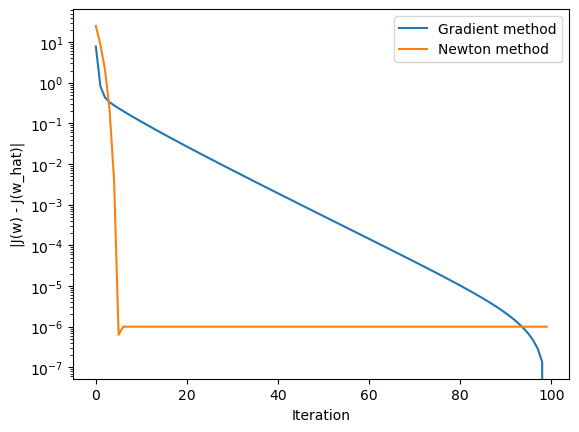

In [11]:
# 片対数グラフで表示
plt.plot(range(num_iter), gradinet_J_diff, label='Gradient method')
plt.plot(range(num_iter), newton_J_diff, label='Newton method')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|J(w) - J(w_hat)|')
plt.legend()
plt.show()

Newton方のほうが答えに早くたどり着くことができる。

# Problem 2

## 1.

In [ ]:
def J_1(w, A, mu, lam):
    return 1 / 2 * np.dot((w - mu).T, np.dot(A, (w - mu))) + lam * np.linalg.norm(w, 1)

def prox(w, lam, eta):
    return np.sign(w) * np.maximum(0, np.abs(w) - lam * eta)

def proximal_gradient_method(w_init, A, mu, lam, eta, num_iter):
    w = w_init.copy()

    for t in range(num_iter):
        gradient = np.dot(A, (w - mu))  # 勾配計算
        w = w - eta * gradient  # 勾配降下ステップ
        # 近接ステップ
        w = np.sign(w) * np.maximum(0, np.abs(w) - lam * eta)

    return w